In [3]:
import sys, os
import importlib
from importlib import reload
# importlib.import_module(module_name)

import matplotlib
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import scipy
import tqdm
import joblib

sys.path.append("../../../python")
from simhelper import util, root, generator, parser
from simhelper import datatypes
from simhelper import helper_basic as hp
reload(parser)
reload(datatypes)

sys.path.append("..")
import cut_functions
reload(cut_functions)

np.set_printoptions(edgeitems=30, linewidth=100000, 
    precision=3)

Welcome to JupyROOT 6.28/10


In [4]:
data_dir="/home/tomren/geant_projects/musim_test/cedar_cosmic_n"
fname_comb = "/home/tomren/geant_projects/musim_test/cedar/cosmic/cosmic_p/merged_p_1200runs.root"
fname_sig1 = "/home/tomren/geant_projects/mathusla-newsim/build/data/run_0_digi_recon_skim.root"

fbkg = root.tfile_reader(fname_comb)
fbkg.ls()
## Get metadata
fbkg.get_tree("metadata_digi")
metadata_digi = fbkg.get_entry(0)
fbkg.get_tree("data;1")
print("Entries", fbkg.entries)

fsig1 = root.tfile_reader(fname_sig1)
fsig1.ls()
fsig1.get_tree("data;1")
print("Entries", fsig1.entries)

None
Entries 839934
None
Entries 4011
TFile**		/home/tomren/geant_projects/musim_test/cedar/cosmic/cosmic_p/merged_p_1200runs.root	
 TFile*		/home/tomren/geant_projects/musim_test/cedar/cosmic/cosmic_p/merged_p_1200runs.root	
  KEY: TTree	metadata;1	Metadata for reconstruction
  KEY: TTree	metadata_digi;1	Metadata for digitization
  KEY: TTree	metadata_recon;1	Simulation metadata
  KEY: TParameter<int>	N_MERGED;1	
  KEY: TTree	data;1	Reconstruction Tree Skimmed
TFile**		/home/tomren/geant_projects/mathusla-newsim/build/data/run_0_digi_recon_skim.root	
 TFile*		/home/tomren/geant_projects/mathusla-newsim/build/data/run_0_digi_recon_skim.root	
  KEY: TTree	metadata;1	Metadata for reconstruction
  KEY: TTree	metadata_digi;1	Metadata for digitization
  KEY: TTree	metadata_recon;1	Simulation metadata
  KEY: TTree	data;1	Reconstruction Tree Skimmed


In [5]:
reload = True
save = False

efficiency = 0.95

if reload:
    entries = 100000
    # entries = -1
    res_bkg = cut_functions.run_processing(fbkg, entries=entries, efficiency = efficiency);
    if save:
        joblib.dump(res_bkg.data, f"/home/tomren/geant_projects/musim_test/cedar/cosmic/cosmic_p/skim/rrq_baskg_eff{efficiency:.2f}.joblib")
    
    entries = 1000
    # entries = -1
    res_sig1 = cut_functions.run_processing(fsig1, entries=entries, efficiency = efficiency);
    if save:
        joblib.dump(res_sig1.data, f"/home/tomren/geant_projects/musim_test/cedar/cosmic/cosmic_p/skim/rrq_sig1_asdfcosmic_eff{efficiency:.2f}.joblib")

else:
    res_bkg_data = joblib.load(f"/home/tomren/geant_projects/musim_test/cedar/cosmic/cosmic_p/skim/rrq_bkg_eff{efficiency:.2f}.joblib")
    res_bkg = cut_functions.RQ_dict(res_bkg_data)    

Entries 839934


/home/tomren/geant_projects/mathusla-newsim/studies/mathusla40/cosmic_p/../../../python/simhelper/datatypes.py:143: RuntimeWarning: divide by zero encountered in scalar divide
  self.params_truth = np.concatenate((np.delete(digi_loc, self.iv_index), [kx,ky, 1/digi_v[2]]))


/home/tomren/geant_projects/mathusla-newsim/studies/mathusla40/cosmic_p/../cut_functions.py:224: RuntimeWarning: divide by zero encountered in scalar divide
  metric_speed = abs(abs(dr/dt) - 295)
/home/tomren/geant_projects/mathusla-newsim/studies/mathusla40/cosmic_p/../cut_functions.py:228: RuntimeWarning: divide by zero encountered in scalar divide
  metrics_speed.append(abs(dr/dt))


Finished
Entries 4011
Finished


In [232]:
    res_bkg_data = joblib.load(f"/home/tomren/geant_projects/musim_test/cedar/cosmic/cosmic_p/skim/rrq_bkg_eff{efficiency:.2f}.joblib")
    res_bkg = cut_functions.RQ_dict(res_bkg_data)    

In [7]:
# res_sig1 = cut_functions.run_processing(fsig1, entries=entries, efficiency = efficiency);
# res_bkg = cut_functions.RQ_dict(res_bkg_data)

In [233]:
colors = ["C0", "C1"]
labels = ["rhnmu 4.7", "Bkg p"]

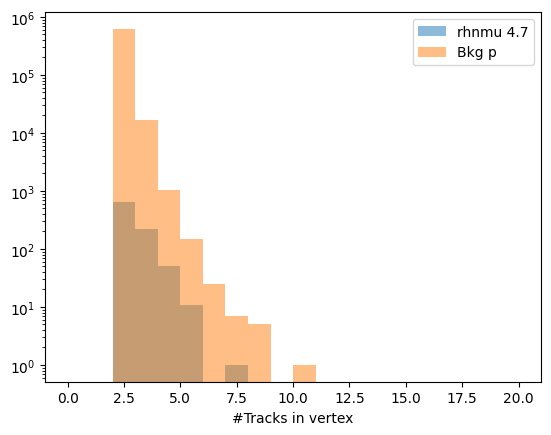

In [234]:
for i, res in enumerate([res_sig1, res_bkg]):
    # plt.hist(res["vertex_ntracks"] - res["vertex_ndownward_track"], bins=20,range=(0,20), alpha=0.5);
    plt.hist(res["vertex_ntracks"], bins=20,range=(0,20), alpha=0.5, color=colors[i], label=labels[i])
plt.yscale("log")
plt.xlabel("#Tracks in vertex")
plt.legend()
plt.show()

Add cut: Avg distance, passage fraction 1.0, (& > 2 tracks): 0.307776560788609
Add cut: Avg distance, passage fraction 1.0, (& > 2 tracks): 0.028103810789696575


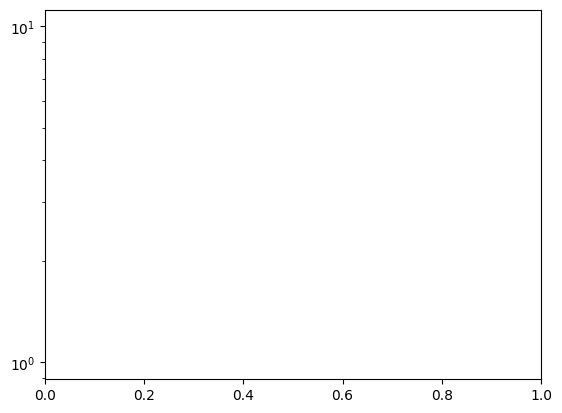

In [236]:
for i, res in enumerate([res_sig1, res_bkg]):
    # mask =  res.get_cut("True")
    # x = (res["vertex_ndigi_active_after_comp"])[mask]
    # y = (res["vertex_track_dist"]/res["vertex_ntracks"])[mask]
    # plt.hist(y,  bins=np.linspace(0,10000,100),alpha=0.3, color=colors[i])

    
    # res.add_cut(lambda res: (res["vertex_track_dist"]/res["vertex_ntracks"])<1500, "Avg distance", PRINT=True)
    res.add_cut(lambda res: res["vertex_ntracks"]>0, "Avg distance", PRINT=True)
    

# plt.ylim(0,10000)
# plt.xlim(0,100)
plt.yscale("log")

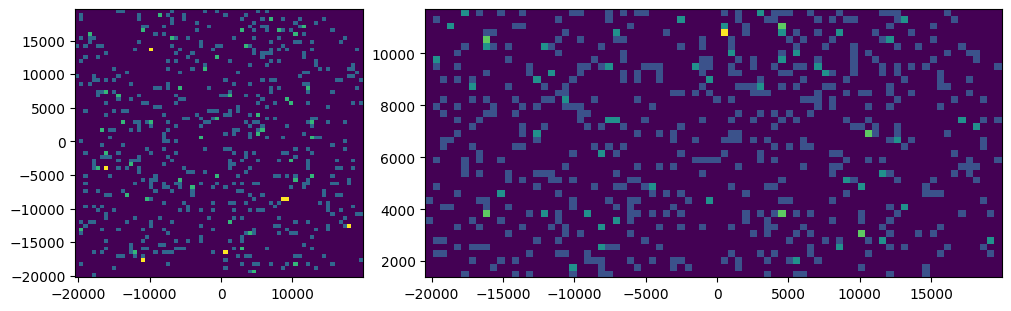

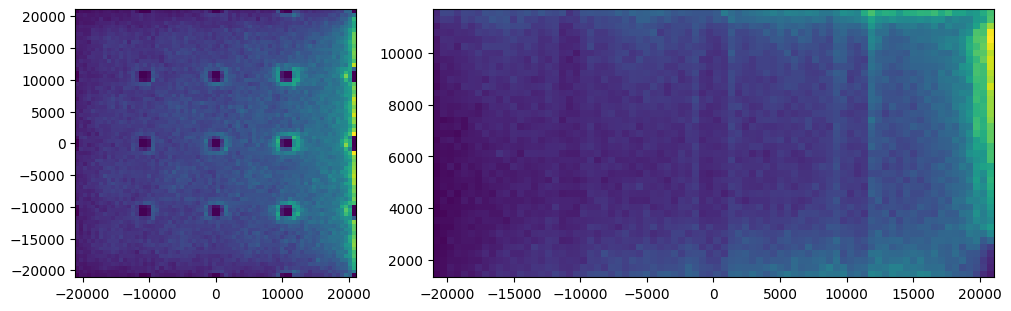

In [237]:
def c_fid(res):
    pillar_locations = [[i*10700,j*10700] for i in range(-2,2) for j in range(-2,3)]
    pillar_locations_right = [[i*10700,j*10700] for i in [2] for j in range(-2,3)]
    cut_range = 1000
    cut_range_right = 1200
    mask = np.ones_like(res["vertex_ndigi"], dtype=bool)
    for x,y in pillar_locations:
        mask = mask & ((abs(res["vertex_xyzt"][:,0]-x)>cut_range) | (abs(res["vertex_xyzt"][:,1]-y)>cut_range))

    for x,y in pillar_locations_right:
        mask = mask & ((abs(res["vertex_xyzt"][:,0]-x)>cut_range_right) | (abs(res["vertex_xyzt"][:,1]-y)>cut_range_right))    
    return mask
    
for i, res in enumerate([res_sig1, res_bkg]):
    res.add_cut(c_fid, "Fiducial volume")

    mask = ~res.get_cut("More than 2 tracks") & c_fid(res)# & res.get_cut("N track downward")#| res.get_cut("True")
    # print(sum(mask))
    fig = plt.figure(figsize=(10,3), layout="constrained")
    spec = fig.add_gridspec(1,3)
    
    ax1 = fig.add_subplot(spec[:, :1])
    ax2 = fig.add_subplot(spec[:, 1:])

    x = (res["vertex_xyzt"][:,0])[mask]
    y = (res["vertex_xyzt"][:,1])[mask]
    ax1.hist2d(x, y, bins=(70,70))#, norm=mpl.colors.LogNorm())
    # ax1.scatter(x, y, alpha=0.83 - np.heaviside(i-1,0)*0.8, s=20 - np.heaviside(i-1,0)*19, color=colors[i])

    x = (res["vertex_xyzt"][:,0])[mask]
    y = (res["vertex_xyzt"][:,2])[mask]
    ax2.hist2d(x, y, bins=(80,40))# norm=mpl.colors.LogNorm())
    # ax2.scatter(x, y, alpha=0.83 - np.heaviside(i-1,0)*0.8, s=20 - np.heaviside(i-1,0)*19, color=colors[i])
    
    plt.show()

Add cut: N track downward, passage fraction 0.864184008762322, (& > 2 tracks): 0.25958378970427165
894
Add cut: N track downward, passage fraction 0.32143958643514803, (& > 2 tracks): 0.004253693605682446
566577


(0.0, 30.0)

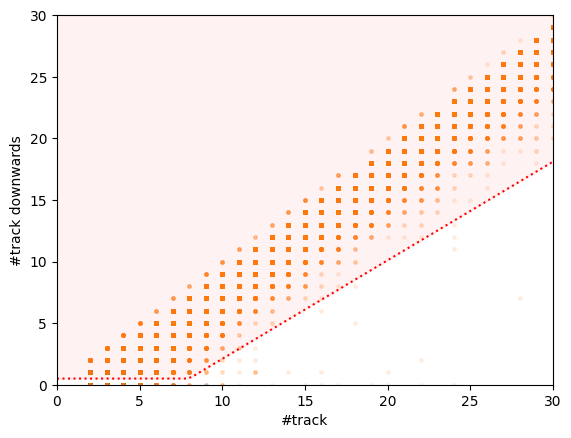

In [239]:
f_ndown_cut = lambda x: ((x-8)*.8 + 0.5) * (x >=8) + 0.5 * (x<8)
c_ndown = lambda data: (res["event_ndownward_track"][:,0] + res["event_ndownward_track"][:,1])< f_ndown_cut(res["event_ntracks"])
# c_ndown = lambda data: (res["event_ndownward_track"])< f_ndown_cut(res["event_ntracks"])

for i, res in enumerate([res_sig1, res_bkg]):
    res.add_cut(c_ndown, "N track downward", PRINT=True)
    
    mask = res.get_cut("Fiducial volume") & res.get_cut("Avg distance")#| res.get_cut("True")
    print(sum(mask))

    # if i==1:
    #     break
    
    x = (res["event_ntracks"])[mask]
    y = (res["event_ndownward_track"][:,0] + res["event_ndownward_track"][:,1])[mask]
    # y = (res["event_ndownward_track"])[mask]
    plt.scatter(x, y, alpha=0.1, s=6, color=colors[i])


xlim=30
ylim=30
x_plot = np.linspace(0,xlim,100)
plt.plot(x_plot, f_ndown_cut(x_plot), color="r", linestyle=":")
plt.fill_between(x_plot, f_ndown_cut(x_plot), ylim, color="r", alpha=0.05)
plt.xlabel("#track")
plt.ylabel("#track downwards")
plt.xlim(0,xlim)
plt.ylim(0,ylim)


776
186959


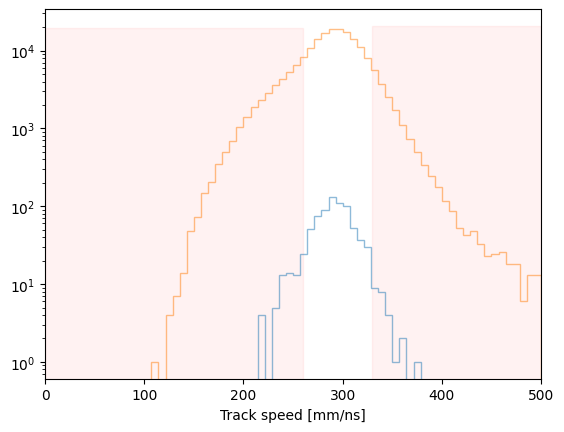

In [240]:
for i, res in enumerate([res_sig1, res_bkg]):
    mask = res.get_cut("Fiducial volume") & res.get_cut("N track downward") & res.get_cut("Avg distance")#& res.get_cut("N track downward")
    print(sum(mask))
    plt.hist(res["vertex_slowest_track"][mask], bins=70,range=(0,500), alpha=0.5+ np.heaviside(i-1, 0) * 0.5, color=colors[i], histtype="step");

    res.add_cut(lambda res: (res["vertex_slowest_track"]> 260) & (res["vertex_slowest_track"]<330), "Track velocity")
    
plt.xlabel("Track speed [mm/ns]")
plt.fill_betweenx(np.linspace(*plt.gca().get_ylim()), 0, 260, color="r", alpha=0.05)
plt.fill_betweenx(np.linspace(*plt.gca().get_ylim()), 330, 500, color="r", alpha=0.05)

plt.xlim(0,500)
plt.yscale("log")
# plt.axvline(275)
plt.show()

Add cut: N digi before, passage fraction 0.9824753559693319, (& > 2 tracks): 0.30339539978094193
698
Add cut: N digi before, passage fraction 0.13099403668791165, (& > 2 tracks): 0.0071234103444442875
136428


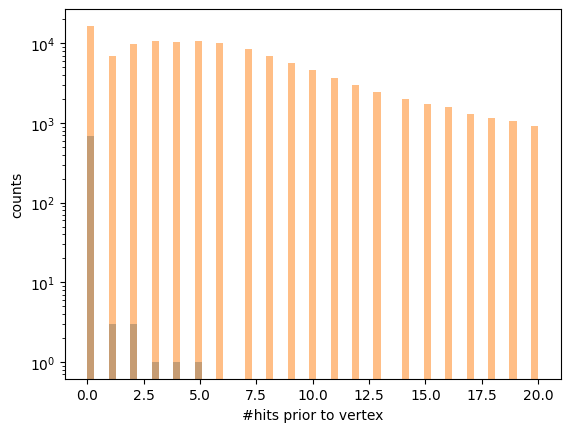

In [241]:
c_track_before = lambda data: res["vertex_ndigi_before_limited"] <= 0

for i, res in enumerate([res_sig1, res_bkg]):
    res.add_cut(c_track_before, "N digi before", PRINT=True)
    mask = res.get_cut("N track downward") & res.get_cut("Avg distance") & res.get_cut("Fiducial volume") & res.get_cut("Track velocity") #&res.get_cut("N_hits vs N_veto 2") #| res.get_cut("True") res.get_cut("N track downward") & res.get_cut("Track velocity") &
    # mask =  res.get_cut("True") 
    print(sum(mask))    
    plt.hist(res["vertex_ndigi_before_limited"][mask], range=(0,20), bins=21*3, alpha=0.5, color=colors[i])
plt.xlabel("#hits prior to vertex")
plt.ylabel("counts")
plt.yscale("log")

689
16482


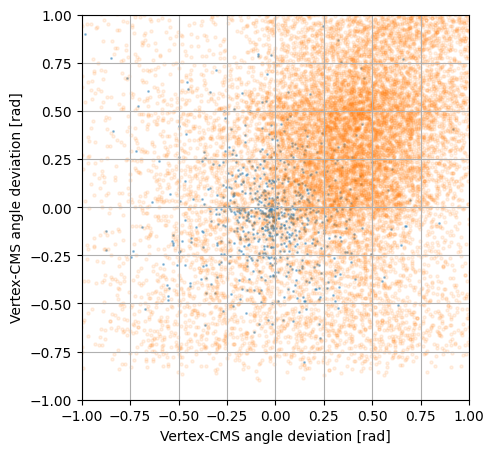

In [243]:
# c_angle_hv = lambda data: ((abs(res["vertex_cms_angle_h"])<0.5) & (abs(res["vertex_cms_angle_v"]) < 0.5))
# c_angle_hv = lambda data: (((res["vertex_cms_angle_h"])<0.2) & ((res["vertex_cms_angle_v"]) < 0.2))

cut_angel_v1 = 0.25
# c_angle_hv = lambda data: np.sqrt((res["vertex_cms_angle_h"]-0.1)**2 + (res["vertex_cms_angle_v"]-0.1)**2) < cut_angel_v1
c_angle_hv = lambda data: ((res["vertex_cms_angle_h"]<0) | (res["vertex_cms_angle_v"]<0)) &(abs(res["vertex_cms_angle_h"]) + abs(res["vertex_cms_angle_v"]) < cut_angel_v1)

# c_angle_hv = lambda data: (((-res["vertex_cms_angle_h"] - res["vertex_cms_angle_v"]) < 0.5) & (res["vertex_cms_angle_h"]<0.02) & (res["vertex_cms_angle_v"]<0.02))

plt.figure(figsize=(5,5))
for i, res in enumerate([res_sig1, res_bkg]):
    res.add_cut(c_angle_hv, "Angle to CMS")
    mask = res.get_cut("N track downward") & res.get_cut("Avg distance") & res.get_cut("Fiducial volume") & res.get_cut("Track velocity")  & res.get_cut("N digi before")# &res.get_cut("N_hits vs N_veto") &res.get_cut("N_hits vs N_veto 2")
    # mask = res.get_cut("True")
    print(sum(mask))
    
    x = (res["vertex_cms_angle_h"])[mask]
    y = res["vertex_cms_angle_v"][mask]
    plt.scatter(x, y, alpha=0.4 + np.heaviside(i, 0) * (-0.3), s=1 + np.heaviside(i, 0) * (4), color=colors[i])




# Plot the cut region


plt.xlabel("Vertex-CMS angle deviation [rad]")
plt.ylabel("Vertex-CMS angle deviation [rad]")
# plt.yscale("log")
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.grid()

229
438


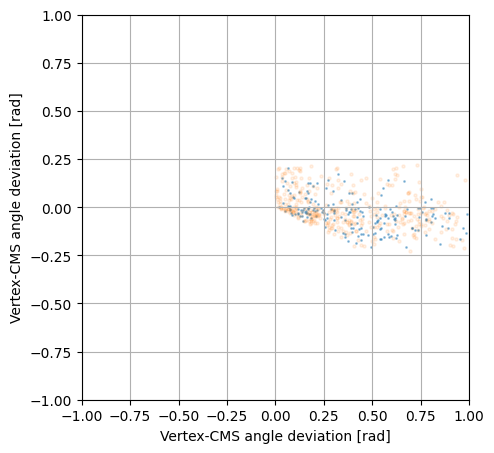

In [260]:
cut_angel_v1 = 0.25
# c_angle_hv = lambda data: np.sqrt((res["vertex_cms_angle_h"]-0.1)**2 + (res["vertex_cms_angle_v"]-0.1)**2) < cut_angel_v1
c_angle_hv = lambda data: ((res["vertex_cms_angle_h"]<0) | (res["vertex_cms_angle_v"]<0)) &(abs(res["vertex_cms_angle_h"]) + abs(res["vertex_cms_angle_v"]) < cut_angel_v1)

# c_angle_hv = lambda data: (((-res["vertex_cms_angle_h"] - res["vertex_cms_angle_v"]) < 0.5) & (res["vertex_cms_angle_h"]<0.02) & (res["vertex_cms_angle_v"]<0.02))

plt.figure(figsize=(5,5))
for i, res in enumerate([res_sig1, res_bkg]):
    # res.add_cut(c_angle_hv, "Angle to CMS")
    mask = res.get_cut("N track downward") & res.get_cut("Avg distance") & res.get_cut("Fiducial volume") & res.get_cut("Track velocity")  & res.get_cut("N digi before") &res.get_cut("Angle to CMS")#| res.get_cut("True")
    print(sum(mask))
    
    x = (res["vertex_cms_angle_v_span"])[mask]
    y = res["vertex_cms_angle_v"][mask]
    plt.scatter(x, y, alpha=0.4 + np.heaviside(i, 0) * (-0.3), s=1 + np.heaviside(i, 0) * (4), color=colors[i])




# Plot the cut region


plt.xlabel("Vertex-CMS angle deviation [rad]")
plt.ylabel("Vertex-CMS angle deviation [rad]")
# plt.yscale("log")
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.grid()

229
438


Text(0, 0.5, 'Vertex-CMS deviation [rad]')

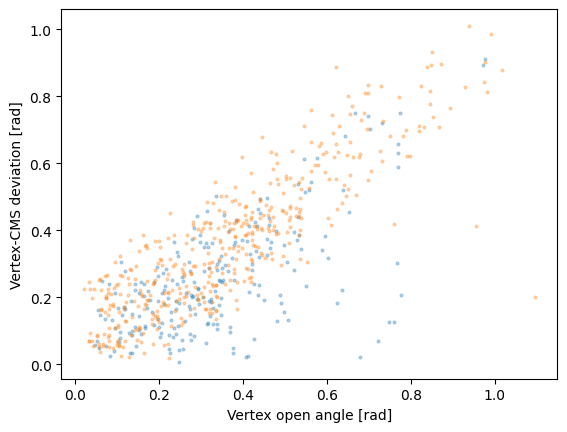

In [254]:

f_cms_angle = lambda x: x+0.5
# c_nhits2 = lambda data: (res["vertex_cms_angle"]) < f_cms_angle(res["vertex_open_angle"])

for i, res in enumerate([res_sig1, res_bkg]):
    # res.add_cut(c_nhits2, "Angle to CMS 2")

    mask = res.get_cut("N track downward")& res.get_cut("Avg distance") & res.get_cut("Fiducial volume") & res.get_cut("Track velocity")  & res.get_cut("N digi before") &res.get_cut("Angle to CMS")#| res.get_cut("True")
    print(sum(mask))

    x = res["vertex_open_angle"][mask]
    y = res["vertex_cms_angle"][mask] # vertex_cms_angle_h vertex_cms_angle
    # plt.scatter(x, y, alpha=0.3 + np.heaviside(i-1, 0) * (-0.2), s=1, color=colors[i])
    plt.scatter(x, y, alpha=0.3 + np.heaviside(i-1, 0) * (-0.1), s=4, color=colors[i])

plt.xlabel("Vertex open angle [rad]")
plt.ylabel("Vertex-CMS deviation [rad]")
# plt.yscale("log")

229
Add cut: N_hits vs N_veto, passage fraction 0.4687842278203724, (& > 2 tracks): 0.14895947426067907
438
Add cut: N_hits vs N_veto, passage fraction 0.0029620862355359545, (& > 2 tracks): 9.39350814651994e-05


(0.0, 50.0)

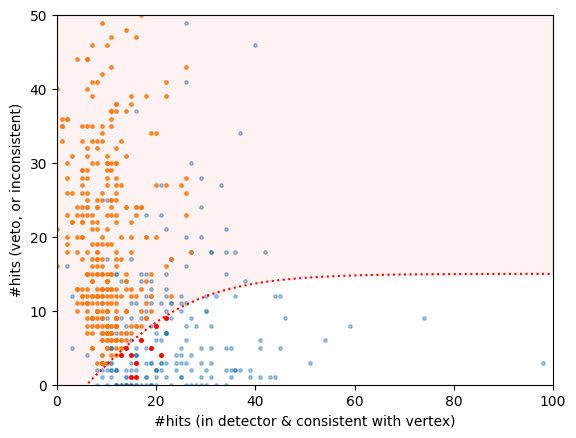

In [293]:
def f_nhits_cut(x):
    x0 = 6
    squeeze = 22
    yscale = 15
    slope = 0.0
    y =  np.tanh((x-x0)/squeeze ) * yscale * (1+ (x-x0)/yscale * slope)
    return y
c_nhits = lambda data: (res["event_ndigi_veto"] + res["event_ndigi_active"] - res["vertex_ndigi_veto_after_comp"] - res["vertex_ndigi_active_after_comp"]) < f_nhits_cut(res["vertex_ndigi_active_after_comp"])


for i, res in enumerate([res_sig1, res_bkg]):
    mask = res.get_cut("N track downward")& res.get_cut("Avg distance") & res.get_cut("Fiducial volume") & res.get_cut("Track velocity")  & res.get_cut("N digi before") &res.get_cut("Angle to CMS")#| res.get_cut("True")
    print(sum(mask))
    x = (res["vertex_ndigi_active_after_comp"])[mask]
    y = (res["event_ndigi_veto"] + res["event_ndigi_active"] - res["vertex_ndigi_veto_after_comp"] - res["vertex_ndigi_active_after_comp"])[mask]
    # y = (res["event_nhits"] - res["vertex_ndigi_active_after_comp"])[mask]
    plt.scatter(x, y,  alpha=0.4+ np.heaviside(i, 0) * 0.4, s=6, color=colors[i])

    res.add_cut(c_nhits, "N_hits vs N_veto", PRINT=True)

# confirm cut
res = res_bkg
mask =  res.get_cut("N track downward")& res.get_cut("Avg distance") & res.get_cut("Fiducial volume") & res.get_cut("Track velocity")  & res.get_cut("N digi before") &res.get_cut("Angle to CMS")  &res.get_cut("N_hits vs N_veto")#| res.get_cut("True")
x = (res["vertex_ndigi_active_after_comp"])[mask]
# y = (res["event_ndigi_veto"])[mask]
y = (res["event_ndigi_veto"] + res["event_ndigi_active"] - res["vertex_ndigi_veto_after_comp"] - res["vertex_ndigi_active_after_comp"])[mask]
plt.scatter(x, y,  alpha=1, s=6, color="r")


xlim = 100
ylim = 50
x_plot = np.linspace(0,xlim,100)
plt.plot(x_plot, f_nhits_cut(x_plot), color="r", linestyle=":")
plt.fill_between(x_plot, f_nhits_cut(x_plot), ylim, color="r", alpha=0.05)
plt.xlabel("#hits (in detector & consistent with vertex)")
plt.ylabel("#hits (veto, or inconsistent)")
plt.xlim(0,xlim)
plt.ylim(0,ylim)

# plt.xlim(0,56)
# plt.ylim(0,56) =

In [282]:
# for i, res in enumerate([res_sig1, res_bkg]):
#     mask =  res.get_cut("True")
#     mask =res.get_cut("N track downward") & res.get_cut("Avg distance") & res.get_cut("Fiducial volume") & res.get_cut("Track velocity")  & res.get_cut("N digi before") &res.get_cut("N_hits vs N_veto") #| res.get_cut("True")

#     y = (res["vertex_chi2"])[mask]
#     plt.hist(y,  bins=np.linspace(0,20,100),alpha=0.3, color=colors[i])

    
#     res.add_cut(lambda res: (res["vertex_track_dist"]/res["vertex_ntracks"])<1500, "Avg distance", PRINT=True)
    

# # plt.ylim(0,10000)
# # plt.xlim(0,100)
# plt.yscale("log")

131
11


(0.0, 50.0)

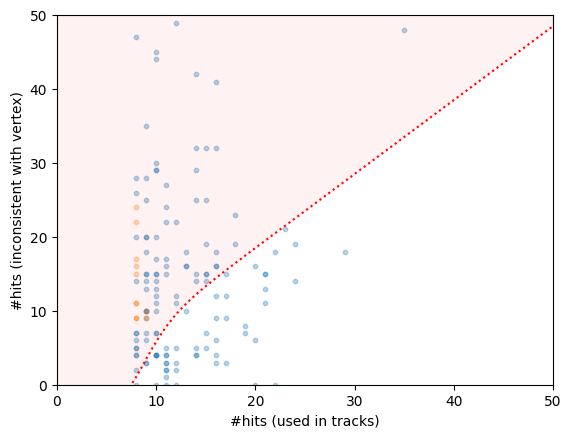

In [294]:
def f_nhits_cut2(x):
    x0 = 7.5
    squeeze = 3
    yscale = 6
    slope = 1
    y =  np.tanh((x-x0)/squeeze ) * yscale * (1+ (x-x0)/yscale * slope*(x>x0))
    # return y * (y>20) + 20 * (y<=20)
    return y
    
c_nhits2 = lambda data: (res["event_nhits"] - res["vertex_ndigi_active_after_comp"]) < f_nhits_cut2(res["event_track_nhits"])

for i, res in enumerate([res_sig1, res_bkg]):
    mask =res.get_cut("N track downward") & res.get_cut("Avg distance") & res.get_cut("Fiducial volume") & res.get_cut("Track velocity")  & res.get_cut("N digi before") &res.get_cut("Angle to CMS") &res.get_cut("N_hits vs N_veto") #| res.get_cut("True")
    print(sum(mask))
    # mask = res.get_cut("True")
    # mask = res.get_cut("N_tracks") 
    # if i==1:
    #     continue

    # x = (res["event_track_nhits"])[mask]
    x = (res["vertex_ndigi"])[mask]
    y = (res["event_nhits"]- res["vertex_ndigi"])[mask]
    # y = (res["event_nhits"] - res["event_track_nhits"] + res["vertex_ndigi"]- res["vertex_ndigi_active_after_comp"])[mask]
    plt.scatter(x, y, alpha=0.3+ np.heaviside(i, 0) * -0.01, s=10, color=colors[i])

    # Add new cut
    res.add_cut(c_nhits2, "N_hits vs N_veto 2")


xlim=50
ylim=50
x_plot = np.linspace(0,xlim,100)
plt.plot(x_plot, f_nhits_cut2(x_plot), color="r", linestyle=":")
plt.fill_between(x_plot, f_nhits_cut2(x_plot), ylim, color="r", alpha=0.05)

plt.xlabel("#hits (used in tracks)")
plt.ylabel("#hits (inconsistent with vertex)")
plt.xlim(0,xlim)
plt.ylim(0,ylim)

117
2


(0.0, 50.0)

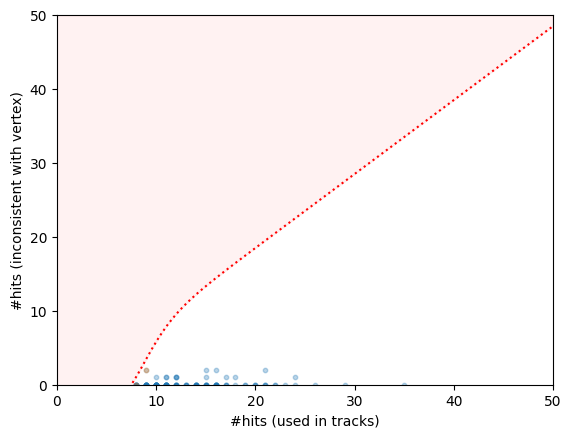

In [295]:
  
c_nhits2 = lambda data: (res["event_nhits"] - res["vertex_ndigi_active_after_comp"]) < f_nhits_cut2(res["event_track_nhits"])

for i, res in enumerate([res_sig1, res_bkg]):
    mask =res.get_cut("N track downward") & res.get_cut("Avg distance") & res.get_cut("Fiducial volume") & res.get_cut("Track velocity")  & res.get_cut("N digi before") &res.get_cut("Angle to CMS") &res.get_cut("N_hits vs N_veto")  &res.get_cut("N_hits vs N_veto 2") #| res.get_cut("True")
    print(sum(mask))
    # mask = res.get_cut("True")
    # mask = res.get_cut("N_tracks") 
    # if i==1:
    #     continue

    # x = (res["event_track_nhits"])[mask]
    x = (res["vertex_ndigi"])[mask]
    y = (res["vertex_ndigi_veto_after_comp"])[mask]
    # y = (res["event_nhits"] - res["event_track_nhits"] + res["vertex_ndigi"]- res["vertex_ndigi_active_after_comp"])[mask]
    plt.scatter(x, y, alpha=0.3+ np.heaviside(i, 0) * -0.01, s=10, color=colors[i])

    # Add new cut
    # res.add_cut(c_nhits2, "N_hits vs N_veto 2")


xlim=50
ylim=50
x_plot = np.linspace(0,xlim,100)
plt.plot(x_plot, f_nhits_cut2(x_plot), color="r", linestyle=":")
plt.fill_between(x_plot, f_nhits_cut2(x_plot), ylim, color="r", alpha=0.05)

plt.xlabel("#hits (used in tracks)")
plt.ylabel("#hits (inconsistent with vertex)")
plt.xlim(0,xlim)
plt.ylim(0,ylim)

117
2


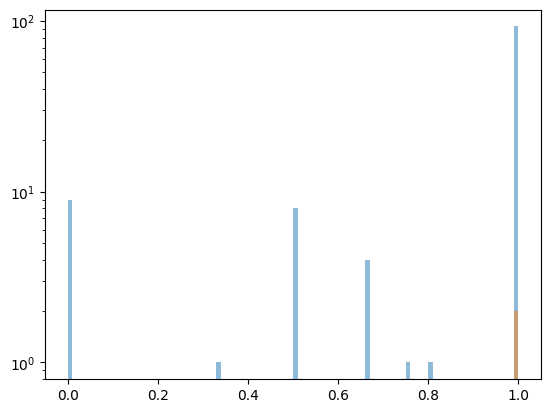

In [296]:


for i, res in enumerate([res_sig1, res_bkg]):

    mask =  res.get_cut("N track downward") & res.get_cut("Avg distance") & res.get_cut("Fiducial volume") & res.get_cut("Track velocity")  & res.get_cut("N digi before") &res.get_cut("N_hits vs N_veto") &res.get_cut("N_hits vs N_veto 2") &res.get_cut("Angle to CMS")
    print(sum(mask))

    x = res["vertex_ndigi"][mask]
    y = res["vertex_topfrac"][mask] # vertex_cms_angle_h vertex_cms_angle

    plt.hist(y, bins=100, range=(0,1), alpha=0.5);

plt.yscale("log")

In [138]:
def list_cut():
    for i in range(len(self.cuts_name)):
        name = self.cuts_name[i]
        mask = self.cuts_dict[name].get_mask()
        print(f"Cut {i:<2}: {name: <20}, passage fraction {sum(mask)/len(mask):.7f}, (& > 2 tracks): {sum(mask&self.mask_2)/len(self.mask_2):.7f}")
    pass

def print_active():
    mask = self.mask_true
    print(f"Total events: {len(mask)}")
    for i in self.cuts_active:
        name = self.cuts_name[i]
        mask = mask & self.cuts_dict[name].get_mask()
        print(f"Cut {i:<2}: {name: <20}, npassed {sum(mask):>6}, passage fraction {sum(mask)/len(mask):.7f}")
    pass        


for i, res in enumerate([res_sig1, res_bkg]):

    self=res
    
    cuts_indirect = [6,7,2,3,]
    cuts_direct = [9,4,5]
    
    self.cuts_active = cuts_indirect + cuts_direct
    print_active()
    
    print()
    self.cuts_active =  cuts_direct + cuts_indirect
    print_active()
    print("\n")

Total events: 913
Cut 6 : N_hits vs N_veto    , npassed    434, passage fraction 0.4753560
Cut 7 : N_hits vs N_veto 2  , npassed    324, passage fraction 0.3548740
Cut 2 : Fiducial volume     , npassed    320, passage fraction 0.3504929
Cut 3 : N track downward    , npassed    313, passage fraction 0.3428258
Cut 9 : Avg distance        , npassed    295, passage fraction 0.3231106
Cut 4 : Track velocity      , npassed    292, passage fraction 0.3198248
Cut 5 : N digi before       , npassed    289, passage fraction 0.3165389

Total events: 913
Cut 9 : Avg distance        , npassed    841, passage fraction 0.9211391
Cut 4 : Track velocity      , npassed    763, passage fraction 0.8357065
Cut 5 : N digi before       , npassed    751, passage fraction 0.8225630
Cut 6 : N_hits vs N_veto    , npassed    399, passage fraction 0.4370208
Cut 7 : N_hits vs N_veto 2  , npassed    300, passage fraction 0.3285871
Cut 2 : Fiducial volume     , npassed    296, passage fraction 0.3242059
Cut 3 : N trac

In [1352]:
2750 * 0.0000016 *30

0.13199999999999998

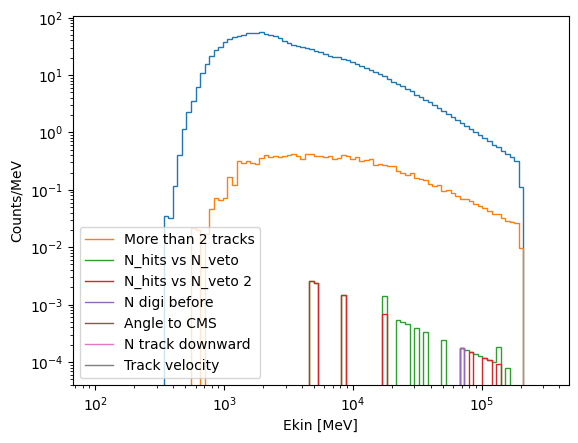

In [1343]:
cuts_active =  cuts_direct + cuts_indirect

mask = res.get_cut("True")
n,ibins = np.histogram(ek[mask], bins=np.logspace(2,5.5,100));
plt.stairs(n/np.diff(ibins), ibins)

for i in cuts_active:
    name = self.cuts_name[i]
    mask = mask & self.cuts_dict[name].get_mask()    
    n,ibins = np.histogram(ek[mask], bins=np.logspace(2,5.5,100));
    plt.stairs(n/np.diff(ibins), ibins, label=name)
plt.yscale("log")
plt.xscale("log")
plt.xlabel("Ekin [MeV]")
plt.ylabel("Counts/MeV")
plt.legend()

6550
5576
0


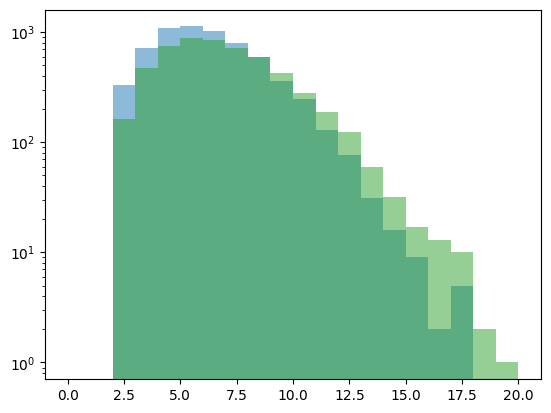

In [1121]:
for i, res in enumerate([res_sig1, res_sig2, res_bkg]):
    mask =  res.get_cut("N_hits vs N_veto") & \
            res.get_cut("N_hits vs N_veto 2") & \
            res.get_cut("N track downward") & \
            res.get_cut("N digi before") & \
            res.get_cut("Track velocity") & \
            res.get_cut("Angle to CMS") #| res.get_cut("True")

    mask =  res.get_cut("N_hits vs N_veto") & \
            res.get_cut("N_hits vs N_veto 2") & \
            res.get_cut("N track downward") & \
            res.get_cut("N digi before") & \
            res.get_cut("Track velocity") & \
            res.get_cut("Angle to CMS") #| res.get_cut("True")    
    
    print(sum(mask))
    # plt.hist((res["vertex_ntracks"] - res["vertex_ndownward_track"])[mask], bins=20,range=(0,20), alpha=0.5);
    plt.hist(res["vertex_ntracks"][mask], bins=20,range=(0,20), alpha=0.5+ np.heaviside(i-1, 0) * 0.5, color=colors[i]);
plt.yscale("log")
plt.show()

8149
8162
25217


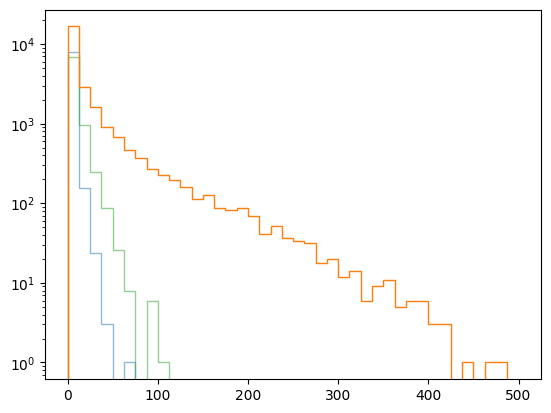

In [905]:
for i, res in enumerate([res_sig1, res_sig2, res_bkg]):
    mask = res.get_cut("More than 2 tracks")
    print(sum(mask))
    # plt.hist((res["vertex_ntracks"] - res["vertex_ndownward_track"])[mask], bins=20,range=(0,20), alpha=0.5);
    plt.hist(res["vertex_ndigi_veto_after_comp"][mask], bins=40,range=(0,500), alpha=0.5+ np.heaviside(i-1, 0) * 0.5, color=colors[i], histtype="step");
plt.yscale("log")
plt.show()

(-1.0, 100.0)

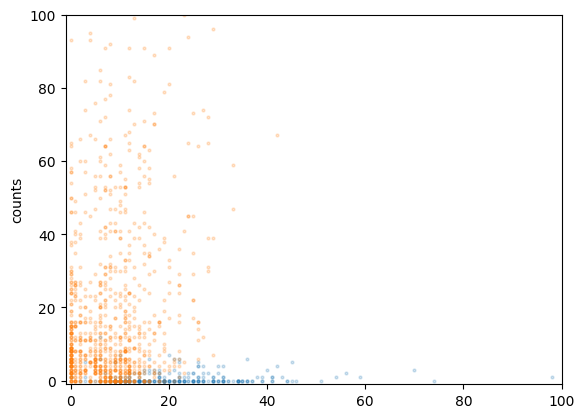

In [249]:
for res in [res_sig1, res_bkg]:
    mask =  res.get_cut("N_hits vs N_veto") & \
            res.get_cut("N_hits vs N_veto 2") & \
            res.get_cut("N track downward") & \
            res.get_cut("N digi before") & \
            res.get_cut("Angle to CMS") #| res.get_cut("True")

    mask = res.get_cut("N track downward") & res.get_cut("N digi before") & res.get_cut("Angle to CMS")
    # plt.hist(res["vertex_ndigi_veto_after_comp"][mask], bins=51, alpha=0.5, range=(-1,20))
    plt.scatter(res["vertex_ndigi_active_after_comp"][mask],(res["vertex_ndigi_veto_after"] - res["vertex_ndigi_veto_after_comp"])[mask], s=4, alpha=0.2)
    # plt.scatter(res["vertex_ndigi_active_after_comp"][mask],res["vertex_ndigi_veto_after"][mask], s=10, alpha=0.5)

plt.ylabel("counts")
# plt.yscale("log")
plt.xlim(-1,100)
plt.ylim(-1,100)

7234
7198
22


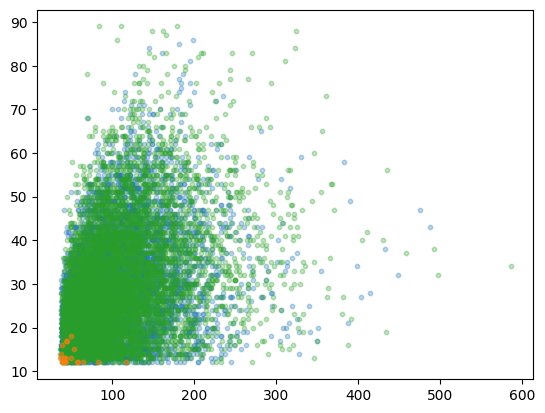

In [1140]:
for i, res in enumerate([res_sig1, res_sig2, res_bkg]):
    mask = res.get_cut("More than 2 tracks") &res.get_cut("N_hits vs N_veto") #| res.get_cut("True")
    print(sum(mask))
    # mask = res.get_cut("True")
    # mask = res.get_cut("N_tracks") 


    x = (res["vertex_ndigi_active_after_comp"])[mask]
    y = (res["vertex_ndigi"])[mask]
    # y = (res["event_nhits"] - res["event_track_nhits"] + res["vertex_ndigi"]- res["vertex_ndigi_active_after_comp"])[mask]
    plt.scatter(x, y, alpha=0.3+ np.heaviside(i-1, 0) * 0.2, s=10, color=colors[i])

In [261]:
res = res_bkg
# mask =res.get_cut("N track downward") & res.get_cut("Avg distance") & res.get_cut("Fiducial volume") & res.get_cut("Track velocity")  & res.get_cut("N digi before") &res.get_cut("N_hits vs N_veto") #| res.get_cut("True")
mask =  res.get_cut("N track downward") & res.get_cut("Avg distance") & res.get_cut("Fiducial volume") & res.get_cut("Track velocity")  & res.get_cut("N digi before") &res.get_cut("N_hits vs N_veto") &res.get_cut("N_hits vs N_veto 2") &res.get_cut("Angle to CMS")

print(sum(mask))
plotinds = res["ROOT_entry"][mask]

2


1 261473


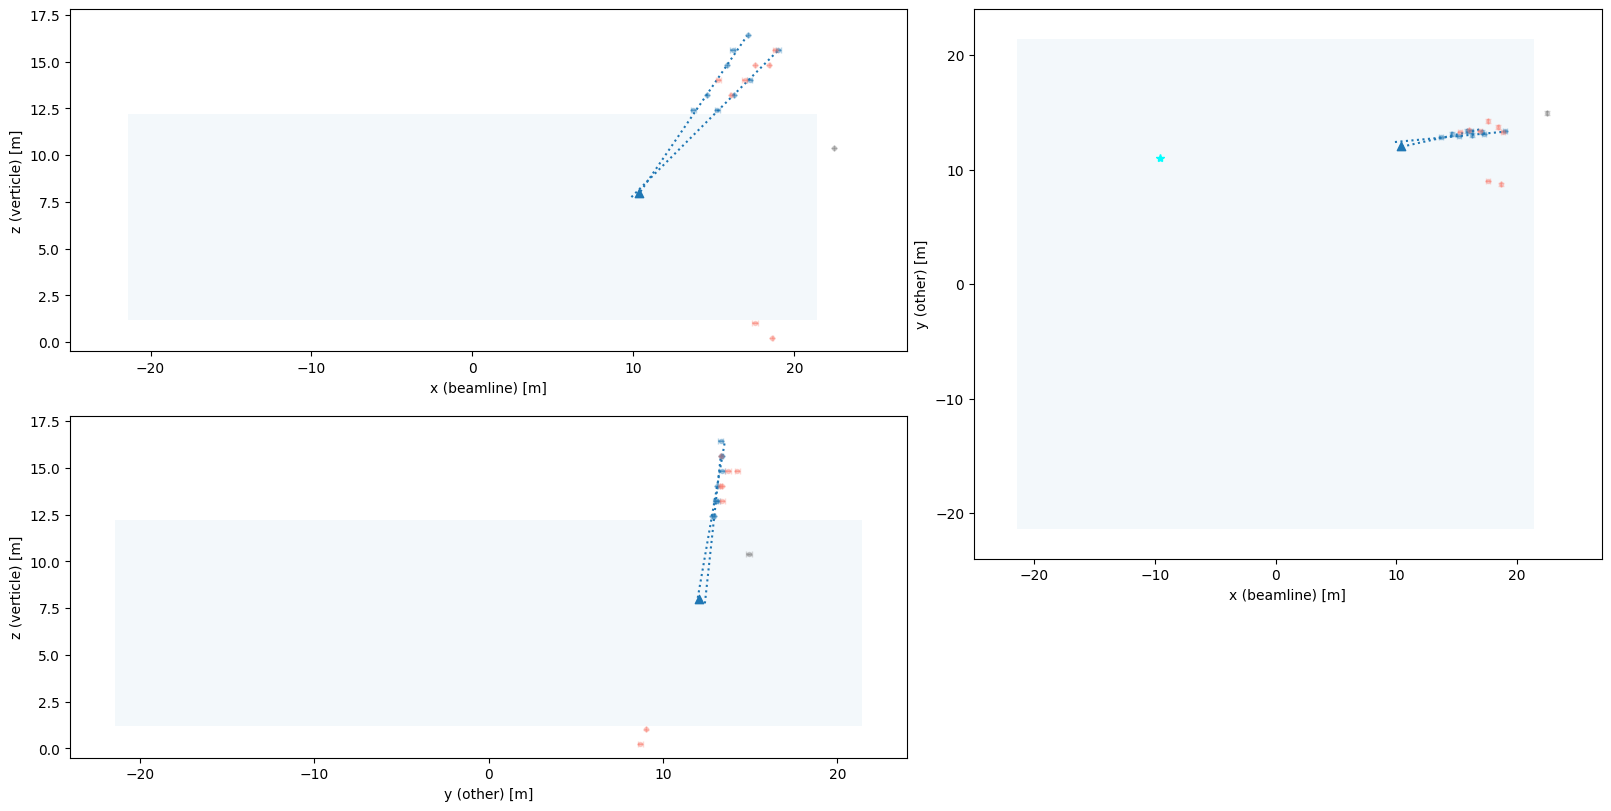

In [264]:
i+=1
# i=0
j=plotinds[i]
print(i, j)

data = fbkg.get_entry(j)
event = datatypes.Event(data, metadata_digi)  
event.plot()

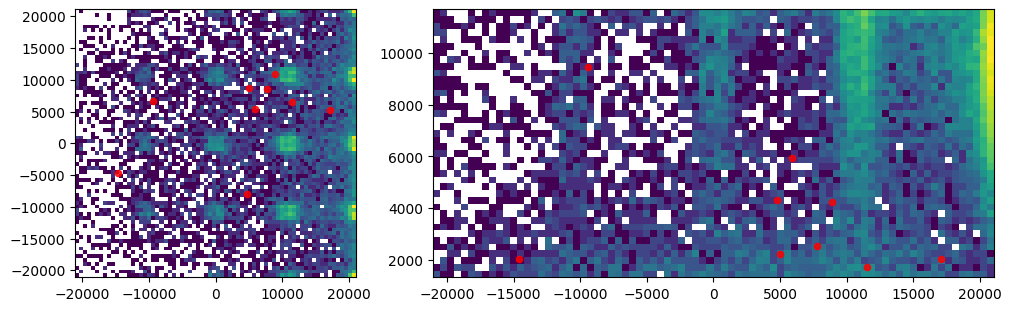

In [1189]:
for i, res in enumerate([res_bkg]):
    mask = res.get_cut("More than 2 tracks") #& res.get_cut("N track downward")#| res.get_cut("True")
    mask_scatter = res.get_cut("More than 2 tracks") &res.get_cut("N_hits vs N_veto")&res.get_cut("N_hits vs N_veto 2") #| res.get_cut("True")

    
    # print(sum(mask))
    fig = plt.figure(figsize=(10,3), layout="constrained")
    spec = fig.add_gridspec(1,3)
    
    ax1 = fig.add_subplot(spec[:, :1])
    ax2 = fig.add_subplot(spec[:, 1:])

    x = (res["vertex_xyzt"][:,0])[mask]
    y = (res["vertex_xyzt"][:,1])[mask]
    xs = (res["vertex_xyzt"][:,0])[mask_scatter]
    ys = (res["vertex_xyzt"][:,1])[mask_scatter]    
    ax1.hist2d(x, y, bins=(70,70), norm=mpl.colors.LogNorm())
    ax1.scatter(xs, ys, alpha=0.83 - np.heaviside(i-1,0)*0.08, s=20 - np.heaviside(i-1,0)*1, color="r")

    x = (res["vertex_xyzt"][:,0])[mask]
    y = (res["vertex_xyzt"][:,2])[mask]
    xs = (res["vertex_xyzt"][:,0])[mask_scatter]
    ys = (res["vertex_xyzt"][:,2])[mask_scatter]    
    ax2.hist2d(x, y, bins=(80,40), norm=mpl.colors.LogNorm())
    ax2.scatter(xs, ys, alpha=0.83 - np.heaviside(i-1,0)*0.08, s=20 - np.heaviside(i-1,0)*1, color="r")
    
    plt.show()

In [1214]:
res = res_sig2
mask = res.get_cut("More than 2 tracks") &res.get_cut("N_hits vs N_veto")&res.get_cut("N_hits vs N_veto 2") #| res.get_cut("True")

        # res.get_cut("Angle to CMS") #| res.get_cut("True")
print(sum(mask))
plotinds = res["ROOT_entry"][mask]

7135


In [1289]:
reload(datatypes)

<module 'simhelper.datatypes' from '/home/tomren/geant_projects/mathusla-newsim/studies/mathusla40/cosmic_p/../../../python/simhelper/datatypes.py'>

55 73


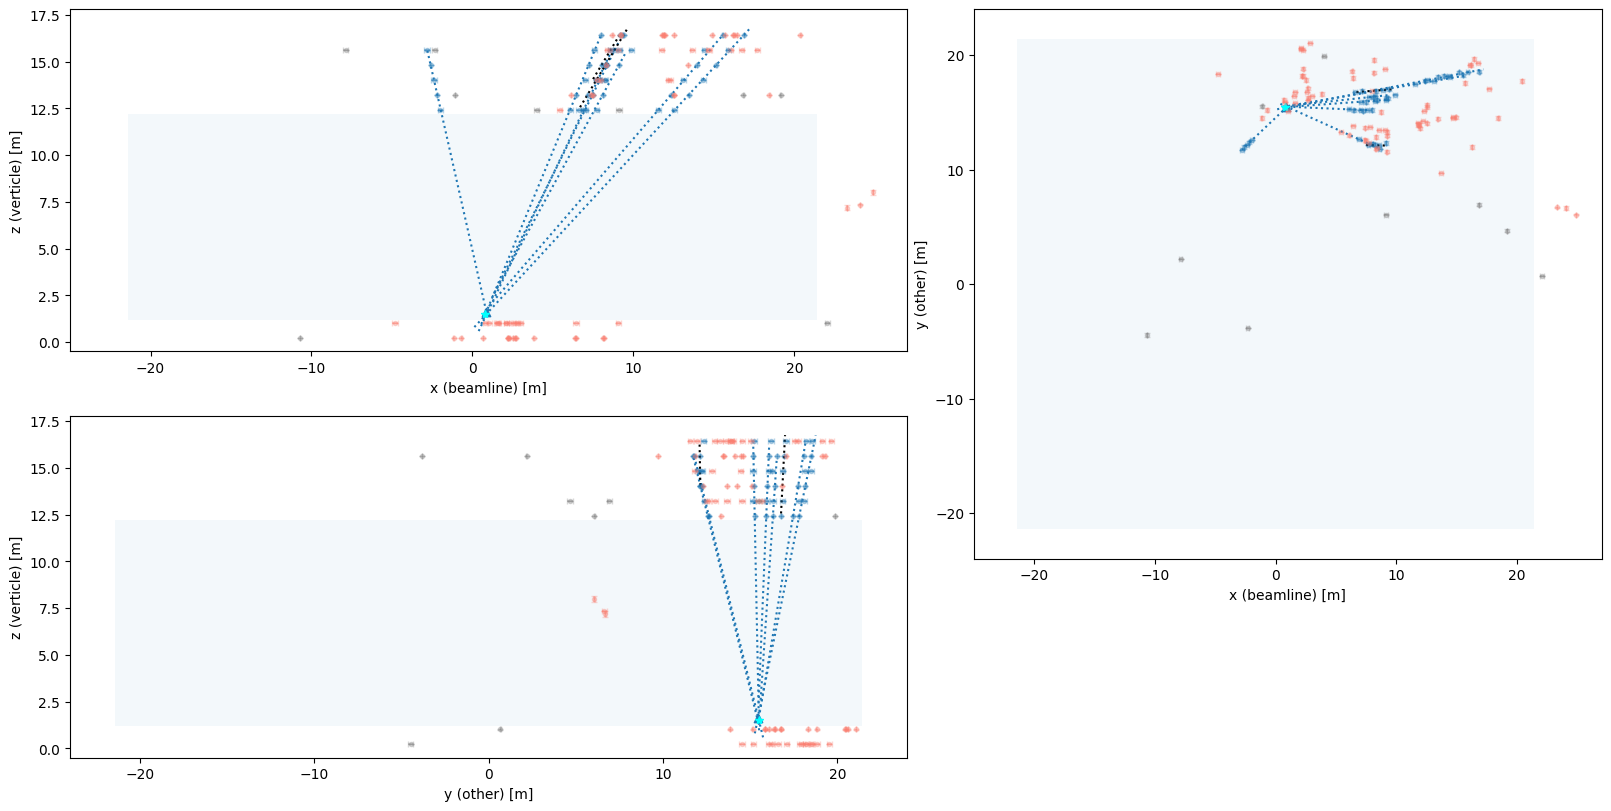

In [1290]:
i+=1
# i=0
j=plotinds[i]
print(i, j)

data = fsig2.get_entry(j)
event = datatypes.Event(data, metadata_digi)  
event.plot()


In [907]:
fsig2.tree

for branch in fsig2.tree.GetListOfBranches():
    # Get the leaf for the branch
    leaf = branch.GetLeaf(branch.GetName())
    # Get the data type of the leaf
    data_type = leaf.GetTypeName()
    
    print(leaf, data_type)

Name: SimEntry Title: SimEntry Int_t
Name: Track_x0 Title: Track_x0 vector<float>
Name: Track_y0 Title: Track_y0 vector<float>
Name: Track_z0 Title: Track_z0 vector<float>
Name: Track_t0 Title: Track_t0 vector<float>
Name: Track_kx Title: Track_kx vector<float>
Name: Track_ky Title: Track_ky vector<float>
Name: Track_kz Title: Track_kz vector<float>
Name: Track_kt Title: Track_kt vector<float>
Name: Track_cov Title: Track_cov vector<float>
Name: Track_chi2 Title: Track_chi2 vector<float>
Name: Track_id Title: Track_id vector<int>
Name: Track_iv_ind Title: Track_iv_ind vector<int>
Name: Track_iv_err Title: Track_iv_err vector<int>
Name: Track_digiInds Title: Track_digiInds vector<int>
Name: Vertex_x0 Title: Vertex_x0 vector<float>
Name: Vertex_y0 Title: Vertex_y0 vector<float>
Name: Vertex_z0 Title: Vertex_z0 vector<float>
Name: Vertex_t0 Title: Vertex_t0 vector<float>
Name: Vertex_cov Title: Vertex_cov vector<float>
Name: Vertex_chi2 Title: Vertex_chi2 vector<float>
Name: Vertex_id Tit